# 61011 Week 2

Over the next week: try to do all of Level 1, and some of Level 2. Skeleton code is provide for the Level 1 targets, below.

In addition, read through and understand the Jupyter notebooks on Logistic Regression, Perceptron, and Machine Learning Training

## Level 1
Rather than importing data directly, we will use the data sets built in to sklearn for these tasks. This saves us having to download and convert csv files.

### Plot train/test errors of a logistic regression, as the number of epochs increase
Note that the code below will throw a series of warnings, because we are stopping the logistic regression before it has fully finished training.

What is the effect of changing the train/test split?
What is the effect of changing the number of epochs?
What is the effect of changing the solver?

In [32]:
# import the iris data set. Information on the data set here: https://en.wikipedia.org/wiki/Iris_flower_data_set
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plot
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

iris = datasets.load_iris()
features = iris.data
labels = iris.target

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=42)

epochs = 30;
training_acc = [0] * (epochs-1)
test_acc = [0] * (epochs-1)

for i in range(1,epochs):
    clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=i)
    # TODO: train the model
    clf.fit(X_train,y_train)
    
    training_acc[i-1] = accuracy_score(y_train,clf.predict(X_train))
    test_acc[i-1] = accuracy_score(y_test,clf.predict(X_test))
    


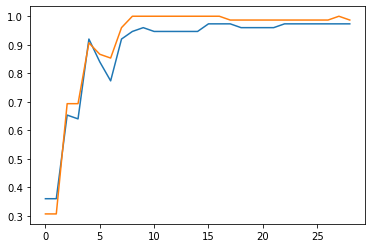

In [33]:
plot(training_acc)
plot(test_acc)

### plot the train/test error over 10 repeats, shuffling the data each time, with error bars

In [34]:
import numpy as np,scipy.stats as st
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import plot

iris = datasets.load_iris()
features = iris.data
labels = iris.target

training_acc = [0] * (10)
test_acc = [0] * (10)

for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.5)
    # TODO: train the model
    clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=i)
    clf.fit(X_train,y_train)
    # TODO: store the training accuracy
    training_acc[i] = accuracy_score(y_train,clf.predict(X_train))
    # TODO: store the test accuracy
    test_acc[i] = accuracy_score(y_test,clf.predict(X_test))
    
# get the mean training_acc and test_acc
training_acc_mean = np.mean(training_acc)
test_acc_mean = np.mean(test_acc_mean)
print("Training acc mean %f" % training_acc_mean)
print("Test acc mean %f"% test_acc_mean)
# generate error bars (either max/min, or the 95% confidence intervals)
ci_train = st.t.interval(0.95,len(training_acc)-1,loc=training_acc_mean,scale=st.sem(training_acc))
ci_test = st.t.interval(0.95,len(test_acc)-1,loc=test_acc_mean,scale=st.sem(test_acc))
print(ci_t)
print(ci_test)

Training acc mean 0.706667
Test acc mean 0.748000
(0.5064929379987196, 0.9068403953346139)
(0.5515960900243904, 0.9444039099756096)


### calculate the 5-fold cross validation error of a logistic regression, accounting for any sources of variance in the performance
We now apply the cross validation. If you are not sure what cross-validation is, or why it is used, please refer to the Machine Learning Training Jupyter notebook and the course textbook.


Note that, before training the model, we have scaled all the features to have zero mean and unit (one) variance. Although this is not always strictly necessary, it is often for methods that use gradient descent, which may otherwise end up prioritising features with a large range of values.

Strictly speaking, scaling should be computed on the training set only, to prevent information leakage between the training and test sets (but we have not done that here)

Also note that in the LogisticRegression model, we have set random_state = 0. This ensures that the random number used to in the algorithm solver is consistent between runs (i.e. removing a source of variance). In this case, where the loss function is convex and the algorithms converge, so it should not make any difference

In [43]:
# apply cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

features_scaled = preprocessing.scale(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2)

# TODO: create the model
model = LogisticRegression(max_iter = 200)
# TODO: train the model
###############
scores=cross_val_score(model, X_train, y_train, cv=5)
# TODO: test the model
#y_pred = model.predict(X_test)
#print(y_pred)


accuracy = np.mean(scores)
print("accuracy = " + str(accuracy))
std_err = np.std(scores) * 1.96
print("confidence interval = " + str(std_err))

accuracy = 0.9583333333333334
confidence interval = 0.10330107023216707


You should understand what a confidence interval is, how it is derived from the Standard Error, and how the standard error differs from the standard deviation.

### Calculate the leave-one-out cross validation error of a logistic regression mode
In leave one out cross validation (LOO-CV), the model is trained on N-1 of N data points, and the tested on the remaining point. This procedure is repeated N times for a different set of N-1 points each time. The method is useful when the number of training instances is very limited, but may provide overly optimistic results.


In [44]:
# apply LOO cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


X = iris.data
y = iris.target

X_scaled = preprocessing.scale(X)
model = LogisticRegression(random_state = 0, max_iter = 1000)
loo = LeaveOneOut()
correct = 0
for train_idx, test_idx in loo.split(X):
    model.fit(X[train_idx], y[train_idx])
    # print(model.predict(X[test_idx]))
    if model.predict(X[test_idx]) == y[test_idx]:
        correct = correct + 1
        
acc = correct / len(X)
print(acc)

0.9666666666666667


## Level 2

Below are a few hints for the level 2 tasks

### Investigate the sensitivity of the logistic regression to the amount of training data examples it sees
In other words, how much does the logistic regression decision boundary (defined by the weight parameters) change, given the amount of training data.

One way to assess the change in the logistic regression model is to examine the changes in the weight parameters. These can be accessed using the coef_ method (e.g. clf.coef_).

An alternative way of investigating the sensitivity of the model is to see how accurate it is as you increase/decrease the training data set.


### Investigate the idea of a 'momentum' parameter and implement it

### Investigate alternative to gradient descent
Try adjusting the 'solver' parameter for the logisticRegression model, and comparing the (i) number of epochs required for convergence (ii) training time. Note that these may be dependent on the problem that you are trying to solve, so you sohuld try multiple data sets.